In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import random 

In [2]:
df=sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<Axes: xlabel='total_bill', ylabel='Count'>

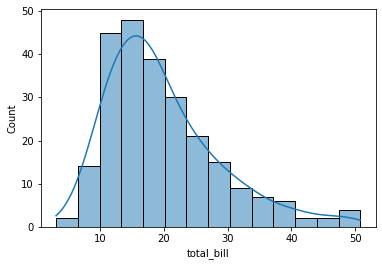

In [6]:
sns.histplot(df['total_bill'],kde=True)

In [12]:
col=list(df.columns.values)
for index in col:
  print(df[index].unique())
  print(10*"=")
df.shape  

[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 13.81 11.02 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07 26.86 25.28
 14.73 10.51 27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03
 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 12.46
 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21 18.24 14.31 14.    7.25
 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08 11.69 13.42 14.26 15.95
 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27 11.17 12.26 18.26  8.51
 14.15 16.   13.16 17.47 34.3  41.19 27.05 16.43  8.35 18.64 11.87  9.78
  7.51 14.07 13.13 17.26 24.55 19.77 29.85 48.17 25.   13.39 16.49 21.5
 12.66 16.21 17.51 24.52 20.76 31.71 10.59 10.63 50.8

(244, 7)

ANOVA-TEST (F-TEST one pass)

We will take 100 sample data from the tips dataset using random function

In [16]:
unique_bill=list(df['total_bill'].unique())
random.seed(30) #set a seed so that everytime we will extract same sample
sample_bill = random.sample(unique_bill,100)

In [17]:
sample_df = df[df['total_bill'].isin(sample_bill)].reset_index(drop=True)

In [18]:
sample_df


,total_bill,tip,sex,smoker,day,time,size
0,10.34,1.66,Male,No,Sun,Dinner,3
1,25.29,4.71,Male,No,Sun,Dinner,4
2,8.77,2.00,Male,No,Sun,Dinner,2
3,26.88,3.12,Male,No,Sun,Dinner,4
4,15.42,1.57,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
102,15.69,3.00,Male,Yes,Sat,Dinner,3
103,10.77,1.47,Male,No,Sat,Dinner,2
104,10.07,1.25,Male,No,Sat,Dinner,2
105,32.83,1.17,Male,Yes,Sat,Dinner,2


In [28]:
#two catagorical variable for testing relationship
sample_df=df[['day','total_bill']]

In [29]:
groups = sample_df.groupby('day',).count().reset_index()
groups

,day,total_bill
0,Thur,62
1,Fri,19
2,Sat,87
3,Sun,76


<Axes: xlabel='day'>

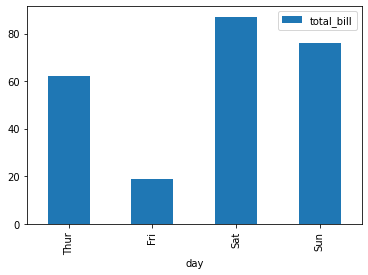

In [30]:
groups.plot(kind='bar',x='day',y='total_bill')

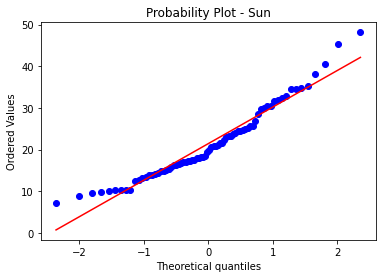

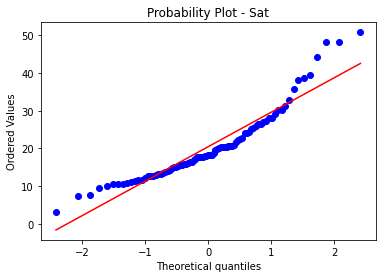

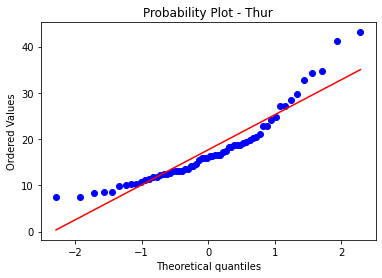

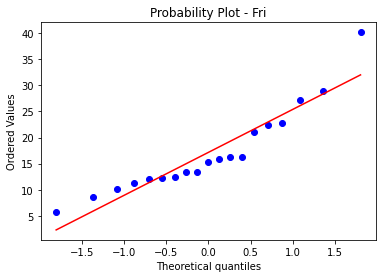

In [31]:
#checking normality of sample_data using Q-Q plot
import scipy.stats as stats
import matplotlib.pyplot as plt
unique_val = sample_df['day'].unique()
for val in unique_val:
    stats.probplot(sample_df[sample_df['day'] == val]['total_bill'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  val)
    plt.show()

The Q-Q plot shows a largely straight-line pattern if it is from a normal distribution. From the above figure, we may assume that the data for each group falls roughly on a straight line.

In [32]:
# calculate ratio of the largest to the smallest sample standard deviation
ratio = sample_df.groupby('day').std().max() / sample_df.groupby('day').std().min()
ratio

total_bill    1.202157
dtype: float64

since ratio of the largest bill to smallest bill for standard daviation is 1.2 < 2 means data assumption is fullfilling

Hypothesis Testing

According to five steps process of hypothesis testing:

H₀: μ₁= μ₂ = μ₃ = … = μ₆ 

H₁: Not all bills means are equal

alpha = 0.05

According to F test statistics:

In [35]:
#Anova f-test
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = sample_df['total_bill'].mean()
SSTR = sample_df.groupby('day').count() * (sample_df.groupby('day').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['total_bill'].sum()

# calculate SSE and update anova table
SSE = (sample_df.groupby('day').count() - 1) * sample_df.groupby('day').std()**2
anova_table['SS']['Within Groups'] = SSE['total_bill'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['total_bill'].sum() + SSE['total_bill'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = sample_df['day'].nunique() - 1
anova_table['df']['Within Groups'] = sample_df.shape[0] - sample_df['day'].nunique()
anova_table['df']['Total'] = sample_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,643.941362,3,214.647121,2.767479,0.042454,3.170918
Within Groups,18614.522721,240,77.560511,,,
Total,19258.464083,243,79.252939,,,


In [36]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 2.76747944328634  and p value is: 0.042453833289520015
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 2.76747944328634  and critical value is: 3.170917505441172
Failed to reject the null hypothesis.
